In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import seaborn as sns
import joblib
%matplotlib inline

In [2]:
def read_data(file_path):
    """
    Read data from a CSV file into a pandas DataFrame.
    
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print("Error: File not found.")
        return None
    
processed_datafarme = read_data('../data/processed/train_model_data.csv')

processed_datafarme.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,0.742527,-1.010909,2,-1.731462,2,0,1.383138,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.322365,0,-1.297775,-0.147150,1,-1.730284,3,1,-0.240677,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.008343,1,1.414363,-0.887515,2,-1.729105,4,1,1.284725,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
def split_data(df, target_column):
   
    x = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable
    return x, y

x , y = split_data(processed_datafarme,'Attrition')



In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2058, 36)
X_test shape: (882, 36)
y_train shape: (2058,)
y_test shape: (882,)


In [6]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

naive_classifier = GaussianNB()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(naive_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'var_smoothing': 1e-07}


In [9]:
naive_classifier = GaussianNB(var_smoothing=1e-07)

naive_classifier.fit(X_train, y_train)

MODEL_TRAIN_SCORE = naive_classifier.score(X_train, y_train)

print(f"Training score for Model: {MODEL_TRAIN_SCORE * 100:.2f}%")

#test model

TEST_MODEL_SCORE = naive_classifier.score(X_test, y_test)

print(f"Testing score for Model: {TEST_MODEL_SCORE * 100:.2f}%")

Training score for Model: 71.72%
Testing score for Model: 71.88%


In [10]:
y_pred = naive_classifier.predict(X_test)  

In [11]:
values = x.loc[10].values
print(values)

pred = y.loc[10]
print(pred)

[-0.2106607   0.01614958  0.84000413  3.         -1.71967912  1.
  1.          0.8910731   4.          2.          0.30439713  0.
  0.         13.          3.          1.          4.5         3.
  0.          0.          0.          0.          0.          1.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          1.          0.        ]
0


In [12]:
naive_classifier.predict([values])

c:\Users\samee\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [13]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[528, 201],
       [ 47, 106]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

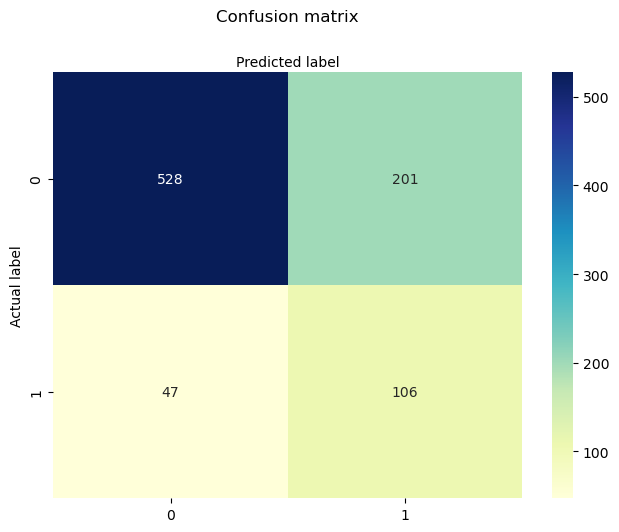

In [14]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
print(metrics.classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       729
           1       0.35      0.69      0.46       153

    accuracy                           0.72       882
   macro avg       0.63      0.71      0.64       882
weighted avg       0.82      0.72      0.75       882



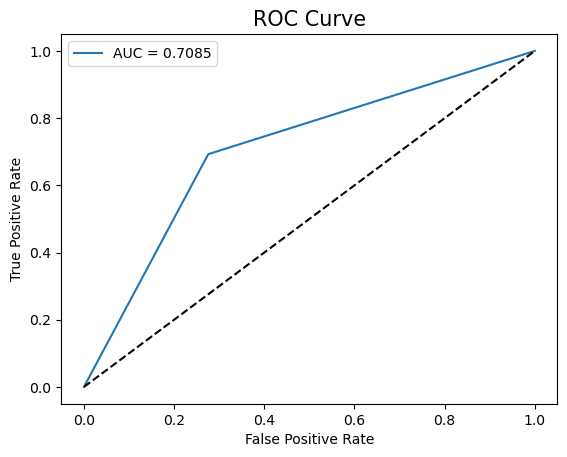

In [16]:
# Assuming you have y_test and y_pred_proba defined
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.4f' %roc_auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend() 

In [17]:
joblib.dump(naive_classifier, '../models/Naive_Bayes_model.pkl')

['../models/Naive_Bayes_model.pkl']